In [1]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from category_encoders import WOEEncoder
from sklearn import utils

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
sns.set_style('whitegrid') # sets the visual style of Seaborn plots to 'whitegrid', which displays a white background with grid lines.
sns.set_palette('pastel')  # sets the color palette to 'pastel', which is one of the predefined color palettes provided by Seaborn. It consists of a set of visually distinct colors suitable for plotting categorical data.

import warnings
# Ignore all warnings
warnings.simplefilter("ignore")


In [2]:
train_df = pd.read_csv(r'..\fraudTrain\fraudTrain.csv', index_col='Unnamed: 0')
test_df = pd.read_csv(r'..\fraudTest\fraudTest.csv', index_col='Unnamed: 0')


In [3]:
train_df.head(3)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [4]:
test_df.head(3)


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0


In [5]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop               

In [6]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-null  i

In [7]:
train_df.shape


(1296675, 22)

In [8]:
test_df.shape


(555719, 22)

In [9]:
# for training dataset
is_fraud = train_df["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])


Yes:  7506
No:  1289169


In [10]:
# for testing dataset
is_fraud = test_df["is_fraud"].value_counts()
print("Yes: ",is_fraud[1])
print("No: ",is_fraud[0])


Yes:  2145
No:  553574


In [11]:
# for dirty datas in training set
print(train_df.isna().sum().sum())
print(train_df.duplicated().sum())


0
0


In [12]:
# for dirty datas in testing set
print(test_df.isna().sum().sum())
print(test_df.duplicated().sum())


0
0


In [13]:
#Change date type from obj to datetime
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'],format='mixed')
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'],format='mixed')

In [14]:
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
test_df['hour'] = test_df['trans_date_trans_time'].dt.hour

train_df['month'] = train_df['trans_date_trans_time'].dt.month
test_df['month'] = test_df['trans_date_trans_time'].dt.month

train_df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,month
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1


In [15]:
unique_transaction_count = len(train_df['trans_num'].unique())
print("Total count of unique transaction numbers:", unique_transaction_count)


Total count of unique transaction numbers: 1296675


In [16]:
# remove non-useful columns
columns_to_drop = ['first', 'unix_time', 'dob', 'cc_num', 'zip', 'city','street', 'state', 'trans_num', 'trans_date_trans_time']
train_df = train_df.drop(columns_to_drop, axis=1)
test_df = test_df.drop(columns_to_drop, axis=1)
train_df.head(2)


,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1


In [17]:
#clean merchant column
train_df['merchant'] = train_df['merchant'].apply(lambda x : x.replace('fraud_',''))
test_df['merchant'] = test_df['merchant'].apply(lambda x : x.replace('fraud_',''))


In [18]:
train_df.info()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   last        1296675 non-null  object 
 4   gender      1296675 non-null  object 
 5   lat         1296675 non-null  float64
 6   long        1296675 non-null  float64
 7   city_pop    1296675 non-null  int64  
 8   job         1296675 non-null  object 
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
 12  hour        1296675 non-null  int32  
 13  month       1296675 non-null  int32  
dtypes: float64(5), int32(2), int64(2), object(5)
memory usage: 138.5+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column      Non-Nul

In [19]:
train_df.head(2)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,"Rippin, Kub and Mann",misc_net,4.97,Banks,F,36.0788,-81.1781,3495,"Psychologist, counselling",36.011293,-82.048315,0,0,1
1,"Heller, Gutmann and Zieme",grocery_pos,107.23,Gill,F,48.8878,-118.2105,149,Special educational needs teacher,49.159047,-118.186462,0,0,1


In [20]:
test_df.head(2)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,Kirlin and Sons,personal_care,2.86,Elliott,M,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0,12,6
1,Sporer-Keebler,personal_care,29.84,Williams,F,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0,12,6


In [21]:
train_df.describe(include='object')

,merchant,category,last,gender,job
count,1296675,1296675,1296675,1296675,1296675
unique,693,14,481,2,494
top,Kilback LLC,gas_transport,Smith,F,Film/video editor
freq,4403,131659,28794,709863,9779


In [22]:
test_df.describe(include='object')

,merchant,category,last,gender,job
count,555719,555719,555719,555719,555719
unique,693,14,471,2,478
top,Kilback LLC,gas_transport,Smith,F,Film/video editor
freq,1859,56370,12146,304886,4119


In [23]:
# applying label encoding for training set
train_df['gender'] = train_df['gender'].map({'F': 0, 'M': 1})

# applying WOE encoding for training set
for col in ['job','merchant', 'category', 'lat', 'last']:
    train_df[col] = WOEEncoder().fit_transform(train_df[col],train_df['is_fraud'])
    

In [24]:
train_df.head(3)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0.959326,0.924914,4.97,-2.469513,0,36.0788,-81.1781,3495,-1.080186,36.011293,-82.048315,0,0,1
1,0.663187,0.898799,107.23,-0.673638,0,48.8878,-118.2105,149,-0.904144,49.159047,-118.186462,0,0,1
2,-0.790166,-0.847622,220.11,0.433257,1,42.1808,-112.2620,4154,1.120434,43.150704,-112.154481,0,0,1


In [25]:
# applying label encoding for testing set
test_df['gender'] = test_df['gender'].map({'F': 0, 'M': 1})

# applying WOE encoding for testing set
for col in ['job','merchant', 'category', 'lat', 'last']:
    test_df[col] = WOEEncoder().fit_transform(test_df[col],test_df['is_fraud'])
    

In [26]:
test_df.head(3)

,merchant,category,amt,last,gender,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,month
0,0.340113,-0.762903,2.86,-1.611619,1,33.9659,-80.9355,333497,-2.243730,33.986391,-81.200714,0,12,6
1,-0.420209,-0.762903,29.84,0.620054,0,40.3207,-110.4360,302,-2.286016,39.450498,-109.960431,0,12,6
2,-0.381243,-0.985812,41.28,-2.124146,0,40.6729,-73.5365,34496,0.472088,40.495810,-74.196111,0,12,6


In [27]:
# splitting of dataset (to get training and testing datasets)

No_class_train = train_df[train_df["is_fraud"]==0]
yes_class_train = train_df[train_df["is_fraud"]==1]

No_class_train = utils.resample(No_class_train, replace=False, n_samples=len(yes_class_train))
down_samples_train = pd.concat([yes_class_train, No_class_train], axis=0)


X_train = down_samples_train.drop("is_fraud", axis=1)
y_train = down_samples_train["is_fraud"]

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

No_class_test = test_df[test_df["is_fraud"]==0]
yes_class_test = test_df[test_df["is_fraud"]==1]

No_class_test = utils.resample(No_class_test, replace=False, n_samples=len(yes_class_test))
down_samples_test = pd.concat([yes_class_test, No_class_test], axis=0)


X_test = down_samples_test.drop("is_fraud", axis=1)
y_test = down_samples_test["is_fraud"]


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


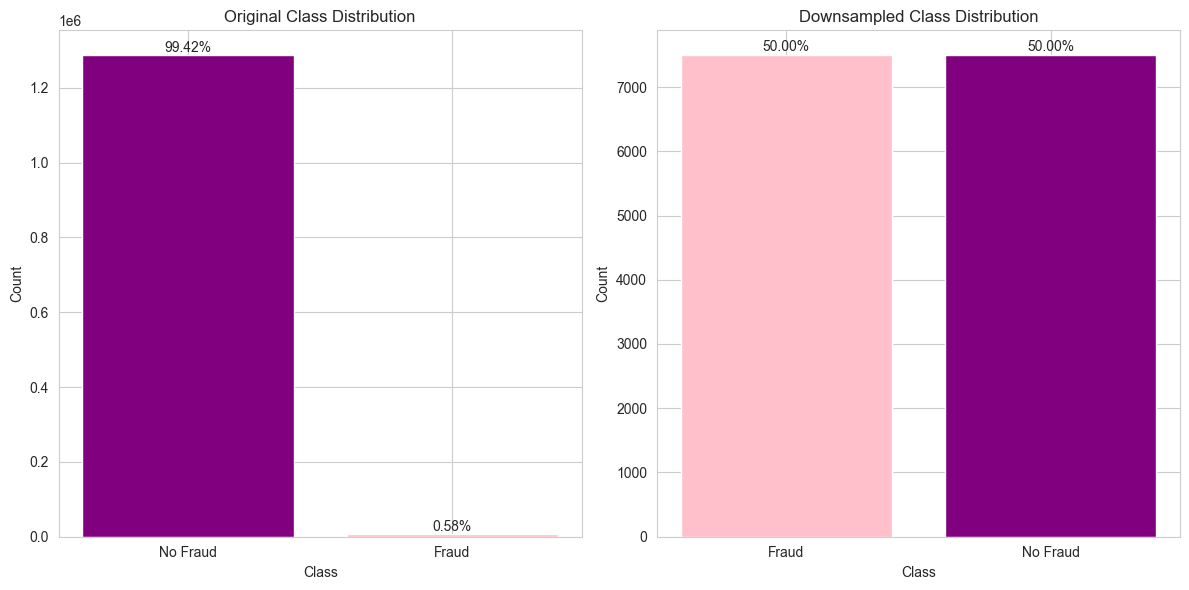

In [28]:
# Count the occurrences of each class in the original dataset
original_class_counts = train_df["is_fraud"].value_counts()

# Count the occurrences of each class in the downsampled dataset
downsampled_class_counts = down_samples_train["is_fraud"].value_counts()

# Calculate the percentage of each class
original_percentages = original_class_counts / len(train_df) * 100
downsampled_percentages = downsampled_class_counts / len(down_samples_train) * 100

# Plotting
plt.figure(figsize=(12, 6))

# Bar chart for original class distribution
plt.subplot(1, 2, 1)
bars_1 = plt.bar(original_class_counts.index, original_class_counts.values, color=['purple', 'pink'])
for bar, label in zip(bars_1, original_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(original_class_counts.index, ['No Fraud', 'Fraud'])

# Bar chart for downsampled class distribution
plt.subplot(1, 2, 2)
bars_2 = plt.bar(downsampled_class_counts.index, downsampled_class_counts.values, color=['purple', 'pink'])
for bar, label in zip(bars_2, downsampled_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, f'{label:.2f}%', ha='center', va='bottom')
plt.title('Downsampled Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(downsampled_class_counts.index, ['No Fraud', 'Fraud'])

plt.tight_layout() # the plots will be automatically adjusted to ensure that there is no overlap between subplots and that all elements are clearly visible.
plt.show()


In [29]:
DT = DecisionTreeClassifier(max_depth=(1), random_state=0)
DT.fit(X_train, y_train)
predict_DT = DT.predict(X_test)
print(classification_report(y_test, predict_DT))

#DT_accuracy = accuracy_score(predict_DT,y_test)
#print('Decision Tree model accuracy is: {:.2f}%'.format(DT_accuracy*100))

# Calculate accuracy of Decision Tree model
DT_accuracy = round(accuracy_score(y_test, predict_DT) *100,2);
print('Decision Tree model accuracy is: {}%'.format(DT_accuracy))


              precision    recall  f1-score   support

           0       0.79      0.97      0.87      2145
           1       0.97      0.74      0.84      2145

    accuracy                           0.86      4290
   macro avg       0.88      0.86      0.86      4290
weighted avg       0.88      0.86      0.86      4290

Decision Tree model accuracy is: 85.83%


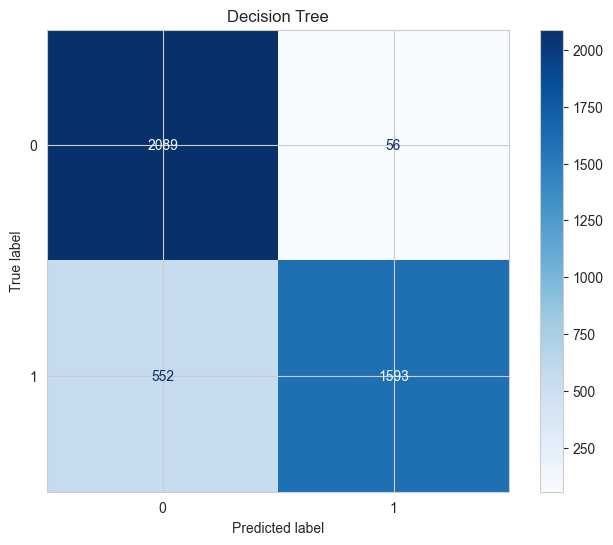

In [30]:
# DT confusion matrix

fig,ax = plt.subplots(figsize=(8,6), dpi=100)

ax.set(title="Decision Tree")

cm = confusion_matrix(y_test, predict_DT)

cm_display = ConfusionMatrixDisplay(cm).plot(ax=ax, cmap="Blues")


In [31]:
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the Logistic Regression model
LR_model = LogisticRegression()

# Fit the model on the imputed training data
LR_model.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data
predict_LR = LR_model.predict(X_test_imputed)

# Evaluate the model
print(classification_report(y_test, predict_LR))

# Calculate accuracy of Decision Tree model
LR_accuracy = round(accuracy_score(y_test, predict_LR) *100,2);
print('Logistic Regression model accuracy is: {}%'.format(LR_accuracy))


              precision    recall  f1-score   support

           0       0.92      0.86      0.89      2145
           1       0.87      0.92      0.89      2145

    accuracy                           0.89      4290
   macro avg       0.89      0.89      0.89      4290
weighted avg       0.89      0.89      0.89      4290

Logistic Regression model accuracy is: 89.14%


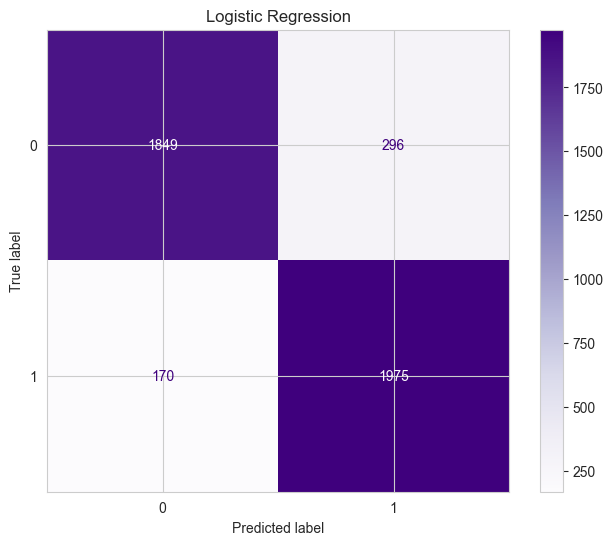

In [32]:
# LR confusion matrix

fig,ax = plt.subplots(figsize=(8,6), dpi=100)

ax.set(title="Logistic Regression")

cm = confusion_matrix(y_test, predict_LR)

cm_display = ConfusionMatrixDisplay(cm).plot(ax=ax, cmap="Purples")


In [33]:
# Initialize the imputer with the desired strategy (e.g., 'mean', 'median', 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the Random Forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=0)

# Fit the model on the imputed training data
RF.fit(X_train_imputed, y_train)

# Make predictions on the imputed test data
predict_RF = RF.predict(X_test_imputed)

# Evaluate the model
print(classification_report(y_test, predict_RF))

# Calculate accuracy of Random Forest model
RF_accuracy = round(accuracy_score(y_test, predict_RF) *100,2);
print('Random Forest model accuracy is: {}%'.format(RF_accuracy))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      2145
           1       0.97      0.95      0.96      2145

    accuracy                           0.96      4290
   macro avg       0.96      0.96      0.96      4290
weighted avg       0.96      0.96      0.96      4290

Random Forest model accuracy is: 96.08%


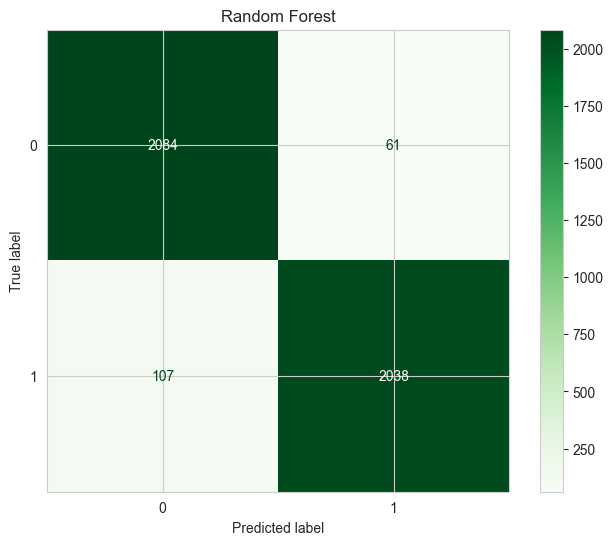

In [34]:
# RF confusion matrix

fig,ax = plt.subplots(figsize=(8,6), dpi=100)

ax.set(title="Random Forest")

cm = confusion_matrix(y_test, predict_RF)

cm_display = ConfusionMatrixDisplay(cm).plot(ax=ax,cmap="Greens")


In [35]:
models = ['Decision Tree','Logistic Regression','RandomForest']
accuracy = [DT_accuracy,LR_accuracy,RF_accuracy]

FinalResult = pd.DataFrame({'Models':models,'Accuracy (in %)': accuracy})

FinalResult


,Models,Accuracy (in %)
0,Decision Tree,85.83
1,Logistic Regression,89.14
2,RandomForest,96.08


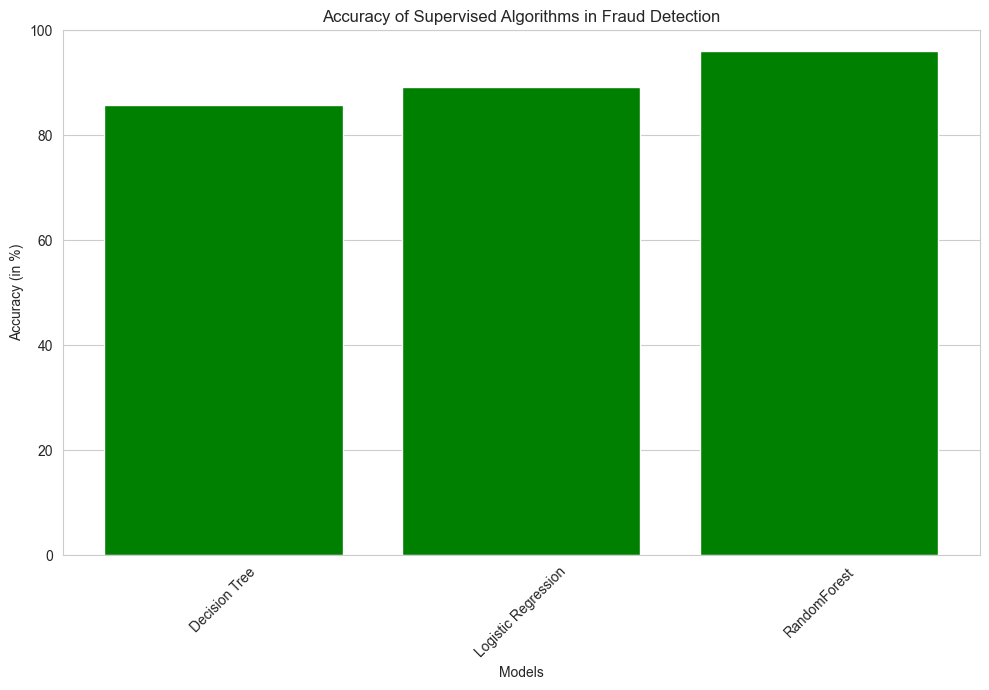

In [36]:
plt.figure(figsize=(10, 7))
plt.bar(FinalResult['Models'], FinalResult['Accuracy (in %)'], color='green')
plt.xlabel('Models')
plt.ylabel('Accuracy (in %)')
plt.title('Accuracy of Supervised Algorithms in Fraud Detection')
plt.ylim(0, 100)  # Set the limit of y-axis from 0 to 1 (accuracy ranges from 0 to 1)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
